In [1]:
# Import dependencies
import torch
import torch.nn as nn
from plot_lib import set_default, show_scatterplot, plot_bases
from matplotlib.pyplot import plot, title, axis

In [2]:
# Set up your device 
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [3]:
# Set up random seed to 1008. Do not change the random seed.
seed = 1008
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed_all(seed)

# 1. Full, slice, fill
Write a function `warm_up` that returns the 2D tensor with integers below. **Do not use any loops**.

```
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
```


Hint: Use `torch.full`, `torch.fill_`, and the slicing operator.

In [4]:
def warm_up():
#     raise NotImplementedError()
    x = torch.ones(13, 13, dtype = torch.int)
    x[1,:] = 2
    x[-2,:] = 2
    x[6,:] = 2
    x[:,1] = 2
    x[:,-2] = 2
    x[:,6] = 2
    x[3:5,3:5] = 3
    x[8:10,3:5] = 3
    x[3:5,8:10] = 3
    x[8:10,8:10] = 3
    return x

# Uncomment line below once you implement this function. 
print(warm_up())

tensor([[1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1]], dtype=torch.int32)


# 2. To Loop or not to loop

## 2.1. `mul_row_loop`
Write a function `mul_row_loop`, using python loops (and not even slicing operators), that gets a 2D tensor
as input, and returns a tensor of same size, equal to the one given as argument, with the first row
kept unchanged, the second multiplied by two, the third by three, etc.
For instance:
```
>>> t = torch.full((4, 8), 2.0)
>>> t
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.]])
>>> mul_row(t)
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
[4., 4., 4., 4., 4., 4., 4., 4.],
[6., 6., 6., 6., 6., 6., 6., 6.],
[8., 8., 8., 8., 8., 8., 8., 8.]])
```

In [5]:
def mul_row_loop(input_tensor):
#     raise NotImplementedError()
    rows, cols = input_tensor.size()
    output_tensor = input_tensor.clone()
    for i in range(1, rows):
        for j in range(cols):
            output_tensor[i][j] = (i + 1) * input_tensor[i][j]
    return output_tensor

# 2.2. `mul_row_fast`
Write a second version of the same function named `mul_row_fast` which uses tensor operations and no looping.

**Hint**: Use broadcasting and `torch.arange`, `torch.view`, and `torch.mul`.

In [6]:
def mul_row_fast(input_tensor):
#     raise NotImplementedError()
    rows, cols = input_tensor.size()
    factor = (torch.arange(rows, dtype = torch.float) + 1).view(-1,1)
    return torch.mul(input_tensor, factor)

# 2.3. `times`
Write a function `times` which takes a 2D tensor as input and returns the run times of `mul_row_loop` and `mul_row_fast` on this tensor, respectively. Use `time.perf_counter`.

Use `torch.ones` to create a 2D tensor of size (1000, 400) full of ones and run `times` on it (there should be more than two orders of magnitude difference).

In [7]:
from time import perf_counter
def times(input_tensor):
#     raise NotImplementedError()
    start1 = perf_counter()
    output_tensor1 = mul_row_loop(input_tensor)
#     print(sum(sum(input_tensor)))
#     print(sum(sum(output_tensor1)))
    stop1 = perf_counter()
    start2 = perf_counter()
    output_tensor2 = mul_row_fast(input_tensor)
#     print(sum(sum(input_tensor)))
#     print(sum(sum(output_tensor2)))
    stop2 = perf_counter()
    return stop1 - start1, stop2 - start2

# Uncomment lines below once you implement this function. 
input_tensor = torch.ones(1000,400)
time_1, time_2 = times(input_tensor)
print('{}, {}'.format(time_1, time_2))

3.1118599087931216, 0.0019331811927258968


# 3. Non-linearities

## 3.1. ReLU
ReLU (Rectified Linear Unit) is a non-linear activation fuction defined as:

$$y = \mathrm{max}(0,x)$$

Define a fully connected neural network `linear_fc_relu` which:
- takes 2 dimensional data as input and passes it through linear modules (`torch.nn.Linear`)
- has one hidden layer of dimension 5 
- has output dimension of 2
- has ReLu as an activation function

Create a tensor with input data $X$ of size (100, 2) using `torch.randn`. 

Following the example in https://github.com/Atcold/pytorch-Deep-Learning-Minicourse/blob/master/02-space_stretching.ipynb, visualize the output of passing `X` through the neural network `linear_fc_relu`.

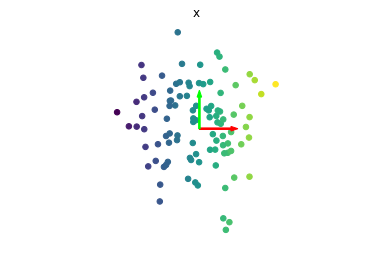

In [8]:
# Input data
dim_in = 2
dim_out = 2
dim_hidden = 5
NL = nn.ReLU()
X = torch.randn(100, dim_in)

# Visualize input:
colors = X[:, 0]
OI = torch.cat((torch.zeros(2, 2), torch.eye(2)))
show_scatterplot(X, colors, title='x')
plot_bases(OI)

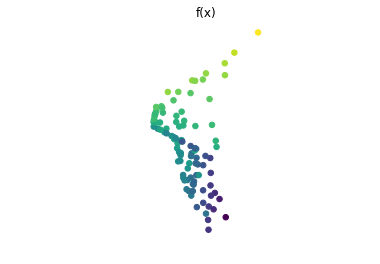

In [9]:
# create 1-layer neural networks with ReLU activation
linear_fc_relu = nn.Sequential(
    nn.Linear(dim_in, dim_hidden),
    NL,
    nn.Linear(dim_hidden, dim_out)
)
# Visualize: TODO
with torch.no_grad():
    Y = linear_fc_relu(X)
show_scatterplot(Y, colors, title='f(x)')
# plot_bases(OI)

## 3.2. Sigmoid
The sigmoid function is another popular choice for a non-linear activation function which maps its input to values in the interval $(0,1)$. It is formally defined as:

$$\sigma(x) = \frac{1}{1+ e^{-x}}$$

Define a new neural network `linear_fc_sigmoid` which is the same architecture as in part `3.1.` but with a sigmoid unit instead of ReLU. 

Using the same $X$ as in part `3.1`, visualize the output of passing `X` through the neural network `linear_fc_sigmoid`.

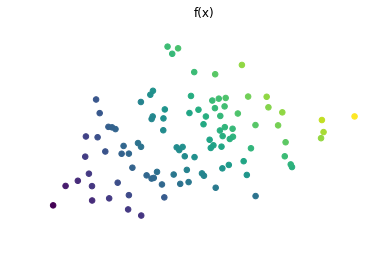

In [10]:
# create 1-layer neural networks with Sigmoid activation
NL = nn.Sigmoid()
linear_fc_sigmoid = nn.Sequential(
    nn.Linear(dim_in, dim_hidden),
    NL,
    nn.Linear(dim_hidden, dim_out)
)
# Visualize: TODO
with torch.no_grad():
    Y = linear_fc_sigmoid(X)
show_scatterplot(Y, colors, title='f(x)')
# plot_bases(OI)